In [1]:
pip install nltk

In [7]:
pip install tensorflow

In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
1563/1563 [==============================] - 41s 25ms/step - loss: 1.5248 - accuracy: 0.4422 - val_loss: 1.3114 - val_accuracy: 0.5399
Epoch 2/10
1563/1563 [==============================] - 38s 25ms/step - loss: 1.1562 - accuracy: 0.5888 - val_loss: 1.0431 - val_accuracy: 0.6323
Epoch 3/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.0060 - accuracy: 0.6438 - val_loss: 0.9769 - val_accuracy: 0.6552
Epoch 4/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9006 - accuracy: 0.6845 - val_loss: 0.9770 - val_accuracy: 0.6552
Epoch 5/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8321 - accuracy: 0.7086 - val_loss: 0.9208 - val_accuracy: 0.6784
Epoch 6/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7807 - accuracy: 0.7253 - val_loss: 0.8901 - val_accuracy: 0.6978
Epoch 7/10
1563/1563 [==============================] - 3

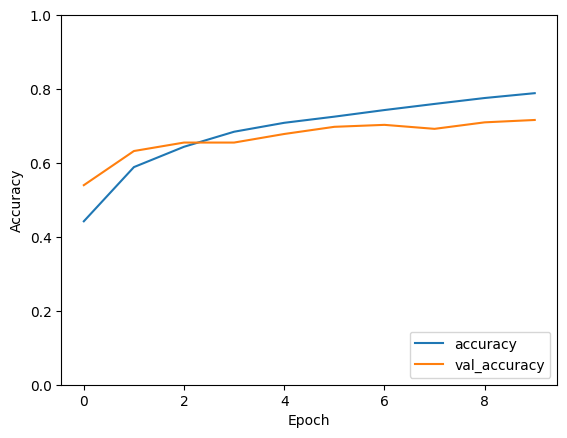

In [9]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # Output layer with 10 units (for 10 classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
